In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# setting the dataframe
df = pd.read_csv('/Users/mattiadevescovi/Desktop/Final Project Boolean/vivino_without_nan.csv')
df

,Unnamed: 0,Product type,Country of origin,Name,Grape,Product rating,Number ratings,Price €,Bold value %,Tannic value %,Sweet value %,Acidic value %,Food pairing,Rating Price Ratio,Rating category
0,0,White wine,Italy,Sesto 21 Sauvignon,Sauvignon Blanc,4.5,62,18.50,42.9805,0.0000,24.1716,68.1926,Vegetarian,0.243243,Medium
1,1,White wine,Italy,Nussbaumer Gewürztraminer,Gewürztraminer,4.4,64,27.70,66.0250,0.0000,41.1219,27.2879,Pork,0.158845,Low
2,2,White wine,South Africa,Albertus Viljoen Limited Release Chenin Blanc,Chenin Blanc,4.4,45,27.65,42.4188,0.0000,13.5308,69.2572,Shellfish,0.159132,Low
3,3,White wine,Italy,Orestilla,Turbiana,4.4,26,26.30,63.0832,0.0000,22.8480,50.5150,Shellfish,0.167300,Low
4,4,White wine,Italy,Sanct Valentin Sauvignon,Sauvignon Blanc,4.3,584,24.40,62.3226,0.0000,22.0402,53.2072,Shellfish,0.176230,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,4446,Red wine,France,Equinoxe Cabernet - Syrah,Blend,4.2,121,17.43,68.0670,56.3093,19.2438,55.2823,Beef,0.240964,Medium
3266,4447,Red wine,South Africa,Classico Cabernet Sauvignon,Cabernet Sauvignon,4.2,114,19.87,73.4789,58.4657,11.0102,55.2869,Beef,0.211374,Medium
3267,4448,Red wine,Italy,Merlot,Merlot,4.2,108,22.80,55.2495,42.9979,12.7430,49.4293,Beef,0.184211,Low
3268,4449,Red wine,Italy,Ca' Carnocchio Veronese,Blend,4.2,108,25.90,64.7983,35.6674,18.7797,28.0679,Beef,0.162162,Low


#### Exploratory Data Analysis

In [20]:
# Check the unique grape type to see if it can be used as a variable to create the ML model
grapes = df['Grape'].unique()
grapes

array(['Sauvignon Blanc', 'Gewürztraminer', 'Chenin Blanc', 'Turbiana',
       'Biancame', 'Trebbiano', 'Blend', 'Nebbiolo', 'Pinot Grigio',
       'Verdejo', 'Fiano', 'Viognier', 'Verdeca', 'Chardonnay',
       'Weissburgunder', 'Malvasia', 'Verdicchio', 'Pinot Blanc',
       'Vermentino', 'Greco', 'Grillo', 'Kerner', 'Cortese', 'Sylvaner',
       'Carricante', 'Alvarinho', 'Moscato Giallo', 'Zibibbo', 'Riesling',
       'Malvasia di Candia Aromatica', 'Vernaccia di San Gimignano',
       'Biancolella', 'Catarratto Bianco', 'Riesling Renano', 'Vernaccia',
       'Pecorino', 'Falanghina', 'Friulano', 'Petit Manseng',
       'Petite Arvine', 'Garganega', 'Assyrtiko', 'Arneis', 'Albariño',
       'Timorasso', 'Nasco', 'Ribolla Gialla', 'Passerina', 'Torbato',
       'Minutolo', 'Moscato Bianco', 'Unrecognized grape',
       'Tocai Friulano', 'Rolle', 'Glera', 'Glera (Prosecco)',
       'Pinot Noir', 'Parellada', 'Cabernet Franc', 'Verdiso', 'Sumoll',
       'Pinot Meunier', 'Tempranillo'

There are too many grape types in the dataframe to be able to create dommy variables and use the column in the ML model

In [21]:
# Check the unique grape type to see if it can be used as a variable to create the ML model
product_type = df['Product type'].unique()
product_type

array(['White wine', 'Sparkling wine', 'Rosé wine', 'Red wine'],
      dtype=object)

In [22]:
# Create dummy variables for the Grape column
dummy_df = pd.get_dummies(df['Product type'])
df = pd.concat([df, dummy_df], axis=1)
df


,Unnamed: 0,Product type,Country of origin,Name,Grape,Product rating,Number ratings,Price €,Bold value %,Tannic value %,Sweet value %,Acidic value %,Food pairing,Rating Price Ratio,Rating category,Red wine,Rosé wine,Sparkling wine,White wine
0,0,White wine,Italy,Sesto 21 Sauvignon,Sauvignon Blanc,4.5,62,18.50,42.9805,0.0000,24.1716,68.1926,Vegetarian,0.243243,Medium,0,0,0,1
1,1,White wine,Italy,Nussbaumer Gewürztraminer,Gewürztraminer,4.4,64,27.70,66.0250,0.0000,41.1219,27.2879,Pork,0.158845,Low,0,0,0,1
2,2,White wine,South Africa,Albertus Viljoen Limited Release Chenin Blanc,Chenin Blanc,4.4,45,27.65,42.4188,0.0000,13.5308,69.2572,Shellfish,0.159132,Low,0,0,0,1
3,3,White wine,Italy,Orestilla,Turbiana,4.4,26,26.30,63.0832,0.0000,22.8480,50.5150,Shellfish,0.167300,Low,0,0,0,1
4,4,White wine,Italy,Sanct Valentin Sauvignon,Sauvignon Blanc,4.3,584,24.40,62.3226,0.0000,22.0402,53.2072,Shellfish,0.176230,Low,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,4446,Red wine,France,Equinoxe Cabernet - Syrah,Blend,4.2,121,17.43,68.0670,56.3093,19.2438,55.2823,Beef,0.240964,Medium,1,0,0,0
3266,4447,Red wine,South Africa,Classico Cabernet Sauvignon,Cabernet Sauvignon,4.2,114,19.87,73.4789,58.4657,11.0102,55.2869,Beef,0.211374,Medium,1,0,0,0
3267,4448,Red wine,Italy,Merlot,Merlot,4.2,108,22.80,55.2495,42.9979,12.7430,49.4293,Beef,0.184211,Low,1,0,0,0
3268,4449,Red wine,Italy,Ca' Carnocchio Veronese,Blend,4.2,108,25.90,64.7983,35.6674,18.7797,28.0679,Beef,0.162162,Low,1,0,0,0


In [23]:
# Drop all the irrelevant columns for the ML model from the dataframe
df = df.drop(['Country of origin', 'Product rating', 'Number ratings', 'Price €', 'Unnamed: 0', 'Product type', 'Name', 'Grape','Rating Price Ratio', 'Rating category'], axis=1)
df 

,Bold value %,Tannic value %,Sweet value %,Acidic value %,Food pairing,Red wine,Rosé wine,Sparkling wine,White wine
0,42.9805,0.0000,24.1716,68.1926,Vegetarian,0,0,0,1
1,66.0250,0.0000,41.1219,27.2879,Pork,0,0,0,1
2,42.4188,0.0000,13.5308,69.2572,Shellfish,0,0,0,1
3,63.0832,0.0000,22.8480,50.5150,Shellfish,0,0,0,1
4,62.3226,0.0000,22.0402,53.2072,Shellfish,0,0,0,1
...,...,...,...,...,...,...,...,...,...
3265,68.0670,56.3093,19.2438,55.2823,Beef,1,0,0,0
3266,73.4789,58.4657,11.0102,55.2869,Beef,1,0,0,0
3267,55.2495,42.9979,12.7430,49.4293,Beef,1,0,0,0
3268,64.7983,35.6674,18.7797,28.0679,Beef,1,0,0,0


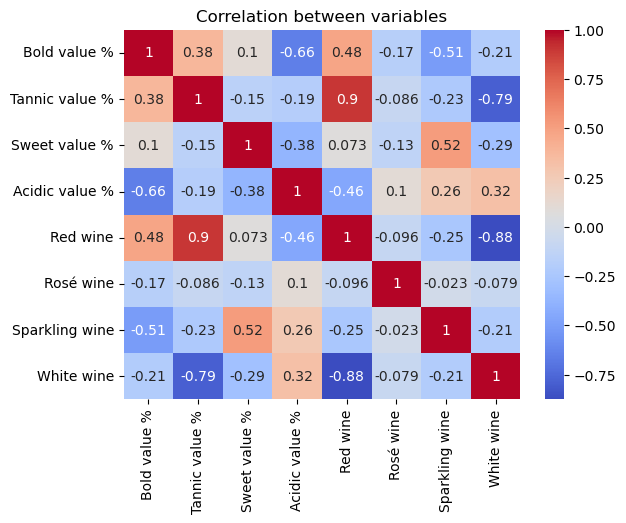

In [24]:
# Plotting a heatmap showcasing the correlation between variables
numeric_cols = ['Bold value %', 'Tannic value %', 'Sweet value %', 'Acidic value %', 'Red wine', 'Rosé wine', 'Sparkling wine', 'White wine']
numeric_df = df[numeric_cols]
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation between variables')
plt.show()

As we can se there is a high correlation between Red wine dummy variable and tannic value % therefore, to avoid multicollinearity I will drop one of the two variables. In particular I will drop the red wine dummy.

In [25]:
df = df.drop(['Red wine'], axis=1)
df

,Bold value %,Tannic value %,Sweet value %,Acidic value %,Food pairing,Rosé wine,Sparkling wine,White wine
0,42.9805,0.0000,24.1716,68.1926,Vegetarian,0,0,1
1,66.0250,0.0000,41.1219,27.2879,Pork,0,0,1
2,42.4188,0.0000,13.5308,69.2572,Shellfish,0,0,1
3,63.0832,0.0000,22.8480,50.5150,Shellfish,0,0,1
4,62.3226,0.0000,22.0402,53.2072,Shellfish,0,0,1
...,...,...,...,...,...,...,...,...
3265,68.0670,56.3093,19.2438,55.2823,Beef,0,0,0
3266,73.4789,58.4657,11.0102,55.2869,Beef,0,0,0
3267,55.2495,42.9979,12.7430,49.4293,Beef,0,0,0
3268,64.7983,35.6674,18.7797,28.0679,Beef,0,0,0


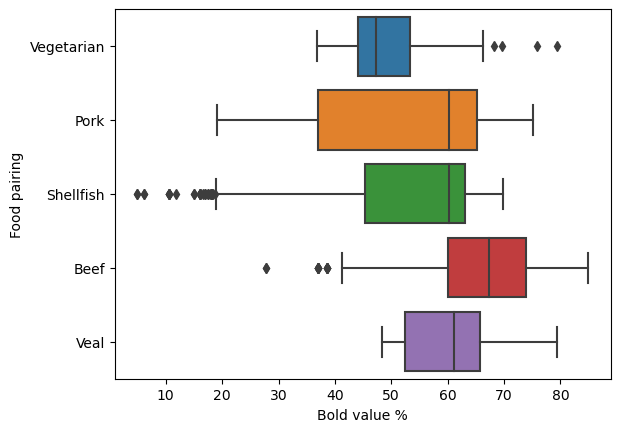

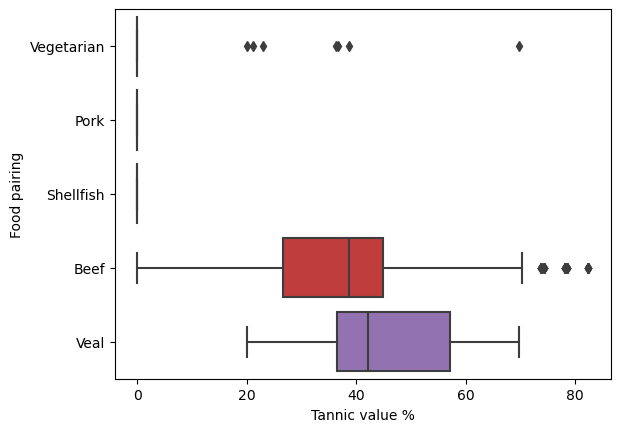

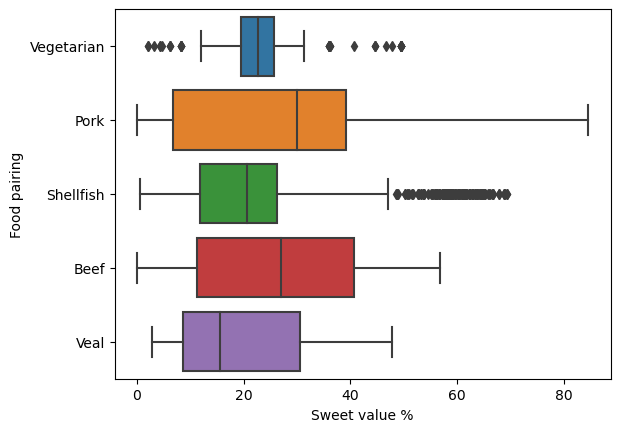

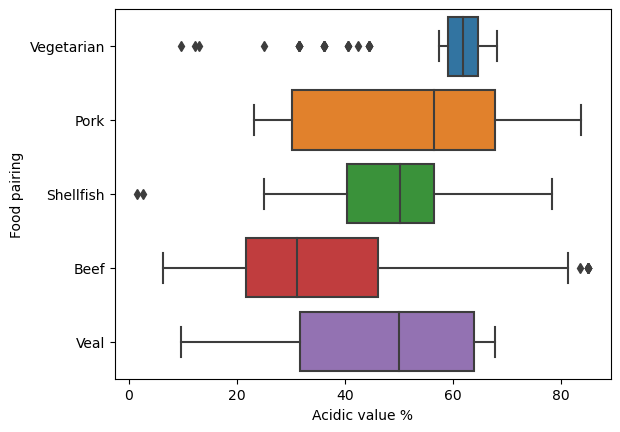

In [26]:
# Let's analyze the distribution of Bold Value, 
for feature in ['Bold value %', 'Tannic value %', 'Sweet value %', 'Acidic value %']: 
    sns.boxplot(x=feature, y='Food pairing', data = df)
    plt.show()

In [27]:
# since the variable that I want to predict is a categorical variable I will use the logistic regression
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Food pairing', axis=1), df['Food pairing'], test_size=0.2, random_state=42)

# create the model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# predict the test set and evaluate the model's performance
y_pred = model.predict(X_test)
accuracy = (y_pred == y_test).mean()
print('Accuracy:', accuracy)

Accuracy: 0.8501529051987767


/Users/mattiadevescovi/opt/anaconda3/envs/Boolean_2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[297,   0,   0,   0,   0],
       [  0,   2,  44,   0,   2],
       [  0,   1, 257,   0,   1],
       [ 10,   0,   0,   0,   0],
       [  0,   1,  39,   0,   0]])

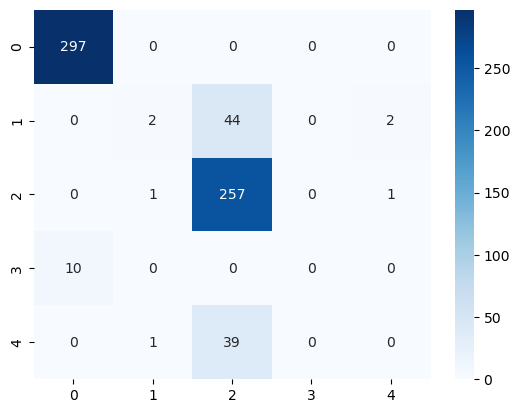

In [29]:
tax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

In [30]:
metrics.accuracy_score(y_test, y_pred)

0.8501529051987767

In [31]:
metrics.precision_score(y_test, y_pred, average='macro')

/Users/mattiadevescovi/opt/anaconda3/envs/Boolean_2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.44466181260777926

In [32]:
metrics.recall_score(y_test, y_pred, average='macro')

0.4067889317889318

#### Test the model on wines not present in the dataset

Now I'm going to test the model on 3 wines that are not present in the dataframe and of which I will get the food pairing based on 'Bold value %', 'Tannic value %', 'Sweet value %', 'Acidic value %', 'Rosé wine', 'Sparkling wine', 'White wine'. The 3 wines are the following
- Antinori Tignanello 2018; Red wine; Bold = 50.3463; Tannic = 30.6051; Sweet = 8.0961; Acidic = 42.0605; The food pairing to guess is Beef.
- Gaja Gaia & Rey Langhe 1999; White wine; Bold = 60.9936; Sweet = 26.9314; Acidic = 45.4524; The food pairing to guess is Pasta.
- Colterenzio (Schreckbichl) LR 2018; White wine; Bold = 62.3272; Sweet = 27.492; Acidic = 35.5574; The food pairing to guess is Pasta.

In [43]:
# create a dataframe with the wine information
wine_data = pd.DataFrame({
    'Bold value %': [50.3463, 60.9936, 62.3272],
    'Tannic value %': [30.6051, 0, 0],
    'Sweet value %': [8.0961, 26.9314, 27.492],
    'Acidic value %': [42.0605, 45.4524, 35.5574],
    'Rosé wine': [0, 0, 0],
    'Sparkling wine': [0, 0, 0],
    'White wine': [0, 1, 1]
}, index=['Antinori Tignanello 2018', 'Gaja Gaia & Rey Langhe 1999', 'Colterenzio (Schreckbichl) LR 2018'])
wine_data

,Bold value %,Tannic value %,Sweet value %,Acidic value %,Rosé wine,Sparkling wine,White wine
Antinori Tignanello 2018,50.3463,30.6051,8.0961,42.0605,0,0,0
Gaja Gaia & Rey Langhe 1999,60.9936,0.0000,26.9314,45.4524,0,0,1
Colterenzio (Schreckbichl) LR 2018,62.3272,0.0000,27.4920,35.5574,0,0,1


In [44]:
# use the trained logistic regression model to predict the food pairing for each wine
predicted_pairings = model.predict(wine_data)

# create a new dataframe with the wine names and predicted food pairings
results = pd.DataFrame({
    'Wine': wine_data.index,
    'Food pairing': predicted_pairings
})
results

,Wine,Food pairing
0,Antinori Tignanello 2018,Beef
1,Gaja Gaia & Rey Langhe 1999,Shellfish
2,Colterenzio (Schreckbichl) LR 2018,Shellfish


Results are correct for Antinori Tignanello 2018 and for Colterenzio (Schreckbichl) LR 2018. For Gaja Gaia & Rey Langhe 1999 it is not correct